### IS727272 - Cordero Hernández, Marco Ricardo

# Exercise 4.3.6 Fashion Classification

In this exercise we will implement a multilayer neural network for multiple classification.

In [1]:
# Libraries
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import os
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Fashion-MNIST Dataset
Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms.

https://github.com/zalandoresearch/fashion-mnist

In [4]:
labels_path = os.path.join('/content/drive/MyDrive/Colab Notebooks/Fashion NN/', 'labels')
images_path = os.path.join('/content/drive/MyDrive/Colab Notebooks/Fashion NN/', 'data')

with open(labels_path,'rb') as lbpath:
    labels = np.frombuffer(lbpath.read(), dtype=np.uint8, offset=8)
        
with open(images_path,'rb') as imgpath:
    images = np.frombuffer(imgpath.read(), dtype=np.uint8, offset=16).reshape(len(labels), 784)

print('images', images.shape)
print('labels', labels.shape)

images (60000, 784)
labels (60000,)


### Get 4 different classes
Let's get classes:

- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
Drop all other classes in next cell:

In [5]:
k = 10
for i in range(k):
    print('class ' + str(i), sum(labels == i))

class 0 6000
class 1 6000
class 2 6000
class 3 6000
class 4 6000
class 5 6000
class 6 6000
class 7 6000
class 8 6000
class 9 6000


### Show some examples

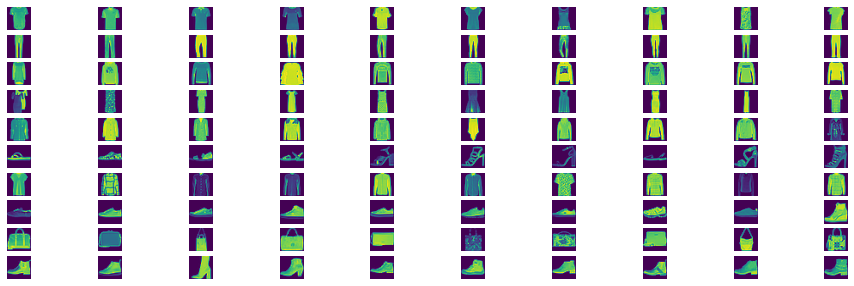

In [6]:
cols = 10
rows = 10
fig, axs = plt.subplots(rows, cols, figsize=(16, 5))
for i in range(rows):
    img = 0
    l = np.nonzero(labels == i)
    for j in np.random.choice(l[0], cols):
        axs[i, img].axis('off')
        hm = images[j, :].reshape(28, 28)
        axs[i, img].imshow(hm.astype(np.uint8))
        img += 1

## Normalizing and splitting data

Each pixel value is from 0 to 255, so we will normalize the data dividing the pixel values by 255. Then, we will split the dataset using the normalized values, laels, a test size of 30% and a random state equals 1.

In [7]:
from sklearn import model_selection
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(labels)
Y = encoder.transform(labels)
Y = np_utils.to_categorical(labels)

In [8]:
# Normalize
img_norm = images/255

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(img_norm, Y, test_size = 0.3, random_state = 1)

print('Train dataset:', X_train.shape, y_train.shape)
print('Test dataset:', X_test.shape, y_test.shape)

for i in range(k):
    print('Train class ' + str(i), sum(y_train == i))
    print('Test class ' + str(i), sum(y_test == i))

Train dataset: (42000, 784) (42000, 10)
Test dataset: (18000, 784) (18000, 10)
Train class 0 [37734 37856 37837 37795 37775 37803 37777 37819 37761 37843]
Test class 0 [16266 16144 16163 16205 16225 16197 16223 16181 16239 16157]
Train class 1 [4266 4144 4163 4205 4225 4197 4223 4181 4239 4157]
Test class 1 [1734 1856 1837 1795 1775 1803 1777 1819 1761 1843]
Train class 2 [0 0 0 0 0 0 0 0 0 0]
Test class 2 [0 0 0 0 0 0 0 0 0 0]
Train class 3 [0 0 0 0 0 0 0 0 0 0]
Test class 3 [0 0 0 0 0 0 0 0 0 0]
Train class 4 [0 0 0 0 0 0 0 0 0 0]
Test class 4 [0 0 0 0 0 0 0 0 0 0]
Train class 5 [0 0 0 0 0 0 0 0 0 0]
Test class 5 [0 0 0 0 0 0 0 0 0 0]
Train class 6 [0 0 0 0 0 0 0 0 0 0]
Test class 6 [0 0 0 0 0 0 0 0 0 0]
Train class 7 [0 0 0 0 0 0 0 0 0 0]
Test class 7 [0 0 0 0 0 0 0 0 0 0]
Train class 8 [0 0 0 0 0 0 0 0 0 0]
Test class 8 [0 0 0 0 0 0 0 0 0 0]
Train class 9 [0 0 0 0 0 0 0 0 0 0]
Test class 9 [0 0 0 0 0 0 0 0 0 0]


## Implementing activation function

When classifying more than two classes, it is standrad to use a softmax as ouput layer:


$$
a_k(x_i) =\frac{e^{z_k}}{\sum_{j}^{K}e^{z_{j}}}
$$

For the activation functions and their derivatives in the hidden layers we will use the sigmoid and the tanh functions:

Sigmoid:

$$
g(z) = \frac{1}{1 + \mathcal{e}^{-z}}
$$
$$
g'(z) = g(z) * (1 - g(z))
$$

Tanh():

$$
g(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}
$$
$$
g'(z) = (1 - (g(z)^2)
$$

We will implement the $g(z)$ and $g'(z)$ functions as sigma and d_sigma functions. In these sigma functions we can choose which type of activation function to implement:

## PCA

In [9]:
from sklearn.decomposition import PCA 
  
pca = PCA(n_components = 500)

X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[2.93004724e-01 1.77955220e-01 6.04284519e-02 4.93788635e-02
 3.71857416e-02 3.40263708e-02 2.37016992e-02 1.90612570e-02
 1.36720109e-02 1.32739667e-02 9.81864099e-03 9.16174316e-03
 7.53145502e-03 6.50691679e-03 6.01549161e-03 5.81738832e-03
 5.52663552e-03 5.29327242e-03 4.57988522e-03 4.53740711e-03
 4.25742087e-03 4.17583098e-03 3.82294961e-03 3.68669163e-03
 3.57867007e-03 3.46102263e-03 3.31991322e-03 3.17027927e-03
 3.02314120e-03 2.94445055e-03 2.75736960e-03 2.61126055e-03
 2.60094066e-03 2.53276170e-03 2.47408235e-03 2.37113862e-03
 2.33236022e-03 2.24565806e-03 2.22595656e-03 2.09625598e-03
 2.01472446e-03 1.95647077e-03 1.93950767e-03 1.79174582e-03
 1.75316276e-03 1.71239401e-03 1.67717963e-03 1.63176606e-03
 1.62049791e-03 1.55609053e-03 1.54181839e-03 1.50791980e-03
 1.47376919e-03 1.42043893e-03 1.39656070e-03 1.37196052e-03
 1.31422840e-03 1.29721577e-03 1.29115824e-03 1.26583909e-03
 1.22855010e-03 1.20308803e-03 1.19119888e-03 1.17489481e-03
 1.14073167e-03 1.129026

## KERAS

In [10]:
r, n  = np.shape(X_train)
input_dim = n

model = Sequential()
model.add(Dense(1000, input_dim = input_dim, activation= 'relu'))
model.add(Dense(1000, activation = 'relu'))
model.add(Dense(1000, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [11]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer = 'adam')

In [12]:
model.fit(X_train, y_train, epochs = 10, batch_size = 1000)

Epoch 1/10
42/42 [==============================] - 12s 275ms/step - loss: 0.5950 - accuracy: 0.7969
Epoch 2/10
42/42 [==============================] - 11s 250ms/step - loss: 0.3166 - accuracy: 0.8849
Epoch 3/10
42/42 [==============================] - 10s 240ms/step - loss: 0.2461 - accuracy: 0.9111
Epoch 4/10
42/42 [==============================] - 10s 242ms/step - loss: 0.1900 - accuracy: 0.9317
Epoch 5/10
42/42 [==============================] - 12s 287ms/step - loss: 0.1397 - accuracy: 0.9505
Epoch 6/10
42/42 [==============================] - 10s 242ms/step - loss: 0.1037 - accuracy: 0.9640
Epoch 7/10
42/42 [==============================] - 10s 242ms/step - loss: 0.0662 - accuracy: 0.9779
Epoch 8/10
42/42 [==============================] - 10s 244ms/step - loss: 0.0499 - accuracy: 0.9830
Epoch 9/10
42/42 [==============================] - 10s 245ms/step - loss: 0.0328 - accuracy: 0.9895
Epoch 10/10
42/42 [==============================] - 10s 238ms/step - loss: 0.0223 - accura

In [13]:
def softmax(z):
    s = np.zeros(len(z))
    exp_z = np.exp(z)
    r, c = exp_z.shape
    for ren in range(r):
      suma = 0
      for col in range(c):
        suma = suma + exp_z[ren][col]
      exp_z[ren] = exp_z[ren] / suma
    return exp_z

def sigmoid(z):
    output = 1 / (1 + np.exp(-z))
    return output

def tanhz(z):
    out_tanh = (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))
    return out_tanh

def sigma(z, activation):
    if activation == 'sigmoid':
      out = sigmoid(z)
    elif activation == 'tanh':
      out = tanhz(z)
    elif activation == 'softmax':
      out = softmax(z)
    return out

def d_sigma(a, activation):
    if activation == 'sigmoid':
      out = a * (1 - a)
    elif activation == 'tanh':
      out = (1 - a ** 2)      
    return out

## Implement prediction and accuracy using softmax

In [14]:
def predict(A):
    h = softmax(A)
    y_hat = np.zeros(len(h))
    for j in range(len(h)):
      ymax = np.max(h[j])
      pos, = np.where(h[j] == ymax)
      y_hat[j] = pos
    return y_hat

def accuracy(A, y):
    m = len(y)
    y_hat = predict(A)
    tptn1 = (y == y_hat)
    tptn = np.sum(tptn1)
    acc = tptn / m
    return acc

### Testing your code

In [15]:
xw = np.array([[.1, .2, .1, .3]])
out = softmax(xw)
print('softmax:\n', out)
print('sum =', out.sum())
print('prediction =', predict(out))

print('\nTwo examples:')
xw = np.array([[.1, .2, .1, .3],
               [.02, .4, .8, .0]])
out = softmax(xw)
print('softmax:\n', out)
print('sum =', out.sum(axis=1))
print('prediction =', predict(out))

softmax:
 [[0.23112977 0.25543791 0.23112977 0.28230254]]
sum = 1.0000000000000002
prediction = [3.]

Two examples:
softmax:
 [[0.23112977 0.25543791 0.23112977 0.28230254]
 [0.17781079 0.26000998 0.38788932 0.1742899 ]]
sum = [1. 1.]
prediction = [3. 2.]


Expected output:

```
softmax:
 [[ 0.23112977  0.25543791  0.23112977  0.28230254]]
sum = 1.0
prediction = [3]

Two examples:
softmax:
 [[ 0.23112977  0.25543791  0.23112977  0.28230254]
 [ 0.17781079  0.26000998  0.38788932  0.1742899 ]]
sum = [ 1.  1.]
prediction = [3 2]
```

## Xavier initialization

Their major goal is to prevent gradient vanishing and too-large weight problems, the formula for a normal distribution is as follows:

$$
W_l = randn(n_l, n_{l-1}) * \sqrt{2 / (n_{l-1} + n_l)}
$$

In [16]:
# nx, number of features
# nh, number of hidden neurons
# ny, number of output neurons
def Xavier_init_w(nx, nh, ny):
    np.random.seed(1)
    W1 = np.random.randn(nh, nx) * ((2 / (nh + nx)) ** 0.5)
    b1 = np.zeros(shape = (1, nh))
    W2 = np.random.randn(ny, nh) * ((2 / (ny + nh)) ** 0.5)
    b2 = np.zeros(shape = (ny, 1))
    W = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    return W

## Forward Propagation

In [17]:
# Implement forward propagation to calculate output probabilities
def forward(x, W):
    W1 = W['W1']
    b1 = W['b1']
    W2 = W['W2']
    b2 = W['b2']
    
    Z2 = np.dot(x, W1.T) + b1
    A2 = sigma(Z2, 'tanh')
    Z3 = np.dot(A2, W2.T) + b2.T
    A3 = sigma(Z3, 'softmax')
    
    Z = {"Z2": Z2, "A2": A2, "Z3": Z3, "A3": A3}
    return A3, Z

### Testing code

In [18]:
m, n = X_train.shape
print(X_train.shape)
W = Xavier_init_w(n, nh = 2, ny = 2)
A3, Z = forward(X_train, W)
print('W1 =', W['W1'].shape)
print('W2 =', W['W2'].shape)
print('prediction =', predict(A3[:10]))

(42000, 500)
W1 = (2, 500)
W2 = (2, 2)
prediction = [0. 1. 1. 1. 0. 1. 1. 1. 1. 1.]


Expected output:

```
W1 = (2, 784)
W2 = (2, 2)
prediction = [1 1 1 1 0 1 0 0 1 1]
```

## Cost Function

Cross entropy error function for multi-class output is:

$$
E = - \sum_{k}^{K} y_k log(a_k)
$$

Where we have softmax function:

$$
a_k = g_k(x_i) = \frac{e^{z_k}}{\sum_{j}^{K}e^{z_{j}}}
$$

Then, the cost for all examples:

$$
J(w) = \frac{1}{m}\sum_{i=1}^{m} E_i
$$

\begin{equation*}
  \frac{\partial{E_i}}{\partial z_k} = \begin{cases}
    a_k - 1(y_i = k) &\text{if $y_k$ is the class}\\
    a - y &\text{if $y$ is one-hot}
  \end{cases}
\end{equation*}



In [19]:
def onehot(y4, k):
    m = len(y4)
    yk = np.zeros((m,k))
    for j in range(m):
      for i in range(k):
        if y4[j] == i:
          yk[j][i] = 1
    return yk

def cost(A, y):  
    m, k = A.shape
    c = 0
    yk = onehot(y, k)
    lA = np.log(A)
    c = yk * lA
    E = (-1 / m) * np.sum(c)
    return E

In [20]:
out = np.array([[0.2, 0.1, 0.4, 0.3],
                [0.1, 0.2, 0.3, 0.4]])
t = np.array([1, 2])
print('cost =', cost(out, t))
out[range(len(t)), t] -= 1
print(out)

cost = 1.753278948659991
[[ 0.2 -0.9  0.4  0.3]
 [ 0.1  0.2 -0.7  0.4]]


Expected output:

```
cost = 1.75327894866
[[ 0.2 -0.9  0.4  0.3]
 [ 0.1  0.2 -0.7  0.4]]
```

## Backward propagation

1. For output layer $\delta_l = \frac{1}{m} a - y$
2. For hidden layer $\delta_l = g'(z_l) * \delta_{l+1} w_l$

**Gradients**

1. For bias term, $\frac{\partial}{\partial b_l} = sum(\delta_{l+1})$, recall that shape of $\frac{\partial}{\partial b_l}$ must match the shape of $b_l$
2. For weights, $\frac{\partial}{\partial w_l} = \delta_{l+1} a_l$

In [21]:
def backward(W, Z, x, y):
    m = x.shape[0]
    
    W1 = W['W1']
    W2 = W['W2']

    A2 = Z['A2']
    A3 = Z['A3']

    Z2 = Z['Z2']
    Z3 = Z['Z3']
    
    y = onehot(y, 4)
    
    d3 = (1/m) * (A3 - y)
    dW2 = np.dot(d3.T, A2)
    db2 = np.sum(d3, axis = 0)
    d2 = d_sigma(Z2, 'tanh') * np.dot(d3, W2)
    dW1 = np.dot(d2.T, x)
    db1 = np.sum(d2, axis = 0)
    
    db2 = db2.reshape(-1,1)
    
    grad = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    return grad

## Model implementation

In [22]:
def model(x, y, nh, alpha = 0.1, lmbda = 0.01, epochs = 1000, debug = False):
    np.random.seed(2)
    m, nx = x.shape
    ny = 4

    W = Xavier_init_w(nx, nh, ny)
    A3, Z = forward(x, W)
    print('Initial cost:', cost(A3, y))
    
    J = []
    for i in range(epochs):
        A3, Z = forward(x, W)
        J.append(cost(A3, y))
        grad = backward(W, Z, x, y)

        W['W1'] = W['W1'] - alpha * grad['dW1'] + lmbda / m * W['W1']
        W['W2'] = W['W2'] - alpha * grad['dW2'] + lmbda / m * W['W2']
        W['b1'] = W['b1'] - alpha * grad['db1'] 
        W['b2'] = W['b2'] - alpha * grad['db2']

        if i % 100 == 0 and debug == True:
            print('epoch', i, 'cost', J[i])
    print('Final cost:', J[epochs-1])
    return W, J

### Testing the code

In [23]:
start = time.time()
W1, J1 = model(X_train, y_train, nh = 100, alpha = 0.00005, lmbda = 1.0, epochs = 00, debug = True)
end = time.time()
print('Elapsed time:', (end - start)/60, 'minutes')

A3,Z = forward(X_train, W1)
acc = accuracy(A3, y_train)
print("Accuracy:", acc)

plt.plot(J1)
plt.title('Cost over epochs')
plt.xlabel('epochs')
plt.ylabel('cost')

ValueError: ignored

In [24]:
from sklearn.metrics import confusion_matrix

def confusionMatrix(A, y):
    m, k = A.shape

    mat = np.zeros((k, k))
    y_hat = predict(A)
    y_hat = y_hat.reshape(-1, 1)
    y = y.reshape(-1, 1)

    for j in range(m):
      for kk in range(k):
        for ll in range(k):
          if y[j] == k:
            if y_hat [j] == ll:
              mat[ll][kk] += 1
    return mat

In [25]:
def plot_confusion_matrix(values, classes):
    import itertools
    m, n = values.shape

    accuracy = np.trace(values) / float(np.sum(values))
    misclass = 1 - accuracy

    plt.figure(figsize=(8, 6))
    plt.imshow(values, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title('Confusion matrix')
    plt.colorbar()

    marks = np.arange(len(classes))
    plt.xticks(marks, classes, rotation=45)
    plt.yticks(marks, classes)

    thresh = values.max() / 2
    for i, j in itertools.product(range(m), range(n)):
        plt.text(j, i, "{:,}".format(values[i, j]),
                 horizontalalignment="center",
                 color="white" if values[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [27]:
labels_path = os.path.join('/content/drive/MyDrive/Colab Notebooks/Fashion NN/', 'labels')
images_path = os.path.join('/content/drive/MyDrive/Colab Notebooks/Fashion NN/', 'data')

with open(labels_path,'rb') as lbpath:
    labels = np.frombuffer(lbpath.read(), dtype=np.uint8, offset=8)
        
with open(images_path,'rb') as imgpath:
    images = np.frombuffer(imgpath.read(), dtype=np.uint8, offset=16).reshape(len(labels), 784)

todrop = [4, 5, 6, 7, 8, 9]
for i in todrop:
    idxs = (labels == i)
    images = images[~idxs]
    labels = labels[~idxs]

img_norm = images/255

#Split dataset
X_train, X_test, y_train, y_test = train_test_split(img_norm, labels, test_size = 0.3, random_state = 1)

A, Z = forward(X_test, W)
print(A.shape)
print(labels.shape)
mat = confusionMatrix(A, y_test)
print(mat)
plot_confusion_matrix(values = mat, classes = ['T-shirt', 'Trouser', 'Pullover', 'Dress'])


ValueError: ignored

# Testing with 10 classes

In [28]:
labels_path = os.path.join('/content/drive/MyDrive/Colab Notebooks/Fashion NN/', 'labels')
images_path = os.path.join('/content/drive/MyDrive/Colab Notebooks/Fashion NN/', 'data')

with open(labels_path,'rb') as lbpath:
    labels = np.frombuffer(lbpath.read(), dtype=np.uint8, offset=8)
        
with open(images_path,'rb') as imgpath:
    images = np.frombuffer(imgpath.read(), dtype=np.uint8, offset=16).reshape(len(labels), 784)

In [29]:
k = 10
for i in range(k):
    print('class ' + str(i), sum(labels == i))

class 0 6000
class 1 6000
class 2 6000
class 3 6000
class 4 6000
class 5 6000
class 6 6000
class 7 6000
class 8 6000
class 9 6000


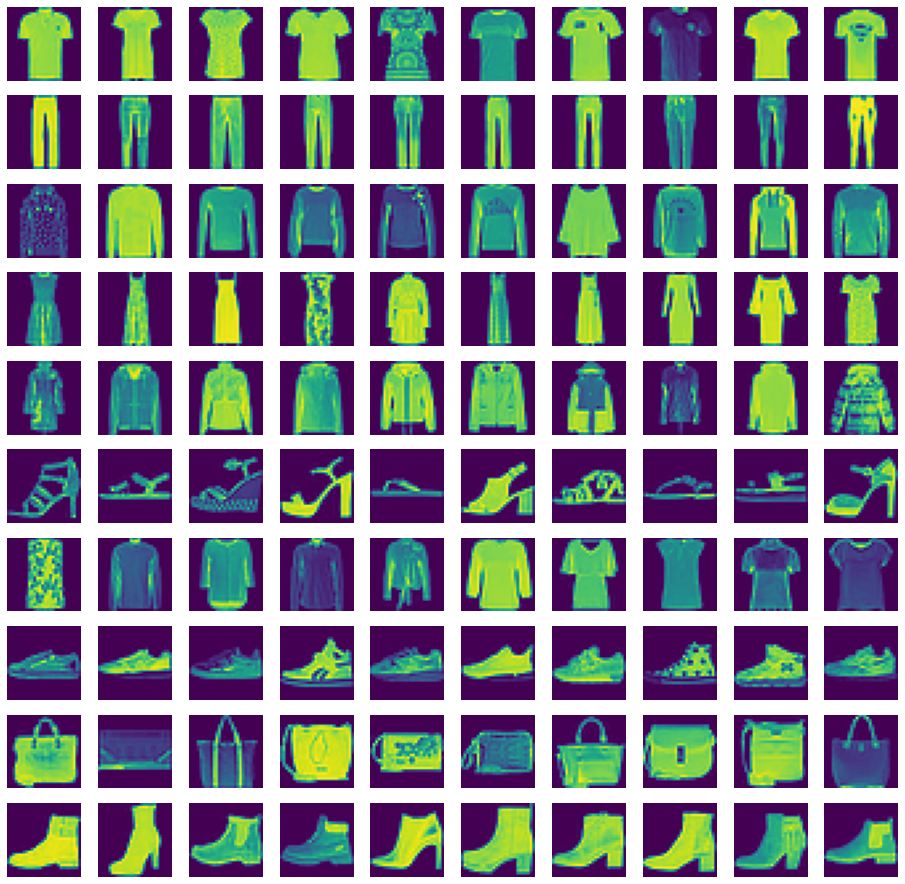

In [30]:
cols = 10
rows = 10
fig, axs = plt.subplots(rows, cols, figsize=(16, 16))
for i in range(rows):
    img = 0
    l = np.nonzero(labels == i)
    for j in np.random.choice(l[0], cols):
        axs[i, img].axis('off')
        hm = images[j, :].reshape(28, 28)
        axs[i, img].imshow(hm.astype(np.uint8))
        img += 1

In [31]:
# Normalize
img_norm = images/255

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(img_norm, labels, test_size = 0.3, random_state = 1)

print('Train dataset:', X_train.shape, y_train.shape)
print('Test dataset:', X_test.shape, y_test.shape)

for i in range(k):
    print('Train class ' + str(i), sum(y_train == i))
    print('Test class ' + str(i), sum(y_test == i))

Train dataset: (42000, 784) (42000,)
Test dataset: (18000, 784) (18000,)
Train class 0 4266
Test class 0 1734
Train class 1 4144
Test class 1 1856
Train class 2 4163
Test class 2 1837
Train class 3 4205
Test class 3 1795
Train class 4 4225
Test class 4 1775
Train class 5 4197
Test class 5 1803
Train class 6 4223
Test class 6 1777
Train class 7 4181
Test class 7 1819
Train class 8 4239
Test class 8 1761
Train class 9 4157
Test class 9 1843


Initial cost: 0.5353585816313156
epoch 0 cost 0.5353585816313156
epoch 100 cost 0.5293585960182516
epoch 200 cost 0.5243529537405907
epoch 300 cost 0.5201647424971656
epoch 400 cost 0.5166301452112676
epoch 500 cost 0.513610587238045
epoch 600 cost 0.5109935049302011
epoch 700 cost 0.5086891174547177
epoch 800 cost 0.5066263680718203
epoch 900 cost 0.5047491264192916
Final cost: 0.5030297237698581
Elapsed time: 19.656795128186545 minutes
Accuracy: 0.1808095238095238


Text(0, 0.5, 'cost')

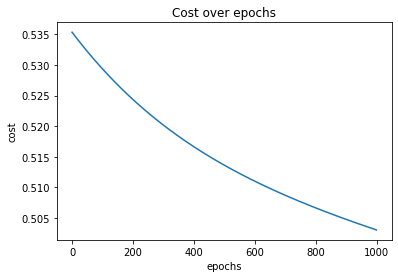

In [32]:
start = time.time()
W1, J1 = model(X_train, y_train, nh = 10, alpha = 0.00005, lmbda = 1.0, epochs = 1000, debug = True)
end = time.time()
print('Elapsed time:', (end - start)/60, 'minutes')

A3,Z = forward(X_train, W1)
acc = accuracy(A3, y_train)
print("Accuracy:", acc)

plt.plot(J1)
plt.title('Cost over epochs')
plt.xlabel('epochs')
plt.ylabel('cost')

In [ ]:
A, Z = forward(X_test, W)
mat = confusionMatrix(A, y_test)
print(mat)
plot_confusion_matrix(values = mat, classes = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal','Shirt', 'Sneaker', 'Bag', 'Ankle boot'])
